In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/쿠다/project1/train.csv')
df.head()

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise


In [4]:
df = df.drop(['Speaker'], axis = 1)
df.head()

,ID,Utterance,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,0,neutral
2,TRAIN_0002,That I did. That I did.,0,neutral
3,TRAIN_0003,So let’s talk a little bit about your duties.,0,neutral
4,TRAIN_0004,My duties? All right.,0,surprise


In [5]:
df = df.drop(['ID'], axis = 1)
df.head()

,Utterance,Dialogue_ID,Target
0,also I was the point person on my company’s tr...,0,neutral
1,You must’ve had your hands full.,0,neutral
2,That I did. That I did.,0,neutral
3,So let’s talk a little bit about your duties.,0,neutral
4,My duties? All right.,0,surprise


In [6]:
df = df.drop(['Dialogue_ID'], axis = 1)
df.head()

,Utterance,Target
0,also I was the point person on my company’s tr...,neutral
1,You must’ve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So let’s talk a little bit about your duties.,neutral
4,My duties? All right.,surprise


### **< 데이터 갯수 확인 >**

먼저 target의 분포를 보자. 각각 데이터가 비슷한 개수만큼 있는지, 부족한 것을 없는지 확인하기위한 과정이다.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


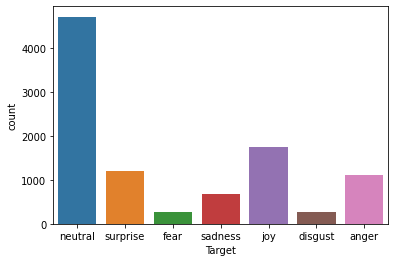

In [7]:
sns.countplot(df["Target"])
plt.show()

위의 그래프를 보면 neutral이 월등히 많고 fear과 disgust가 많이 적은 것을 확인 할 수 있다. 

=> fear 데이터와 disgust 데이터는 무조건 갯수를 더 늘리는게 좋을 것 같고, 나머지 데이터들은 추가할 수 있으면 추가하는 것으로 하자.

## ** fear 추가 **

https://www.kaggle.com/datasets/ishantjuyal/emotions-in-text

In [8]:
df_fear = pd.read_csv('/content/drive/MyDrive/쿠다/project1/Emotion_final.csv')
df_fear.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


df_fear에서 fear 행만 남기겠습니다.

In [9]:
df_fear = df_fear[df_fear['Emotion'] == 'fear']
df_fear.head()

,Text,Emotion
7,i feel as confused about life as a teenager or...,fear
19,i now feel compromised and skeptical of the va...,fear
21,i am feeling completely overwhelmed i have two...,fear
31,i remember feeling acutely distressed for a fe...,fear
53,i was stymied a little bit as i wrote feeling ...,fear


합치기 전에 열이름을 똑같이 바꿔주겠습니다.

In [10]:
df_fear.rename(columns = {'Text':'Utterance', 'Emotion':'Target'}, inplace = True)
df_fear.head()

,Utterance,Target
7,i feel as confused about life as a teenager or...,fear
19,i now feel compromised and skeptical of the va...,fear
21,i am feeling completely overwhelmed i have two...,fear
31,i remember feeling acutely distressed for a fe...,fear
53,i was stymied a little bit as i wrote feeling ...,fear


In [11]:
df = pd.concat([df, df_fear])
df.head()

,Utterance,Target
0,also I was the point person on my company’s tr...,neutral
1,You must’ve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So let’s talk a little bit about your duties.,neutral
4,My duties? All right.,surprise


다시 갯수를 출력해보겠습니다.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


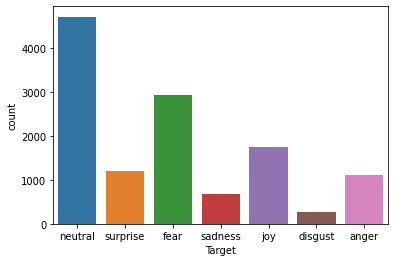

In [12]:
sns.countplot(df["Target"])
plt.show()

확실히 fear 데이터의 갯수가 증가했습니다. 같은 방식으로 sadness의 갯수도 높여주겠습니다.

## ** Sadness 추가 **

In [13]:
df_sad = pd.read_csv('/content/drive/MyDrive/쿠다/project1/Emotion_final.csv')
df_sad.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [14]:
df_sad = df_sad[df_sad['Emotion'] == 'sadness']
df_sad.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
5,ive been feeling a little burdened lately wasn...,sadness
10,i feel like i have to make the suffering i m s...,sadness
13,i feel low energy i m just thirsty,sadness


In [15]:
df_sad.rename(columns = {'Text':'Utterance', 'Emotion':'Target'}, inplace = True)
df_sad.head()

,Utterance,Target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
5,ive been feeling a little burdened lately wasn...,sadness
10,i feel like i have to make the suffering i m s...,sadness
13,i feel low energy i m just thirsty,sadness


In [16]:

df = pd.concat([df, df_sad])
df.head()

,Utterance,Target
0,also I was the point person on my company’s tr...,neutral
1,You must’ve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So let’s talk a little bit about your duties.,neutral
4,My duties? All right.,surprise


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


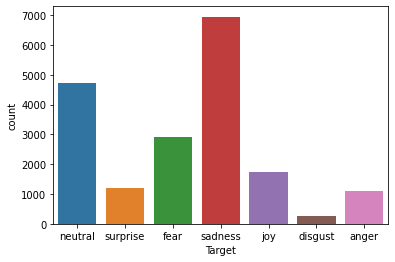

In [17]:
sns.countplot(df["Target"])
plt.show()

어머 sad의 데이터가 너무 많아졌네요 나중에 데이터를 더 줄이던가 해야겠어요.

## **Surprise 추가 **

In [18]:
df_surprise = pd.read_csv('/content/drive/MyDrive/쿠다/project1/Emotion_final.csv')
df_surprise.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [19]:
df_surprise = df_surprise[df_surprise['Emotion'] == 'surprise']
df_surprise.head()

,Text,Emotion
6,ive been taking or milligrams or times recomme...,surprise
32,i have seen heard and read over the past coupl...,surprise
57,i keep feeling pleasantly surprised at his sup...,surprise
64,i am now nearly finished the week detox and i ...,surprise
129,i too feel as if i am a stranger in a strange ...,surprise


In [20]:
df_surprise.rename(columns = {'Text':'Utterance', 'Emotion':'Target'}, inplace = True)
df_surprise.head()

,Utterance,Target
6,ive been taking or milligrams or times recomme...,surprise
32,i have seen heard and read over the past coupl...,surprise
57,i keep feeling pleasantly surprised at his sup...,surprise
64,i am now nearly finished the week detox and i ...,surprise
129,i too feel as if i am a stranger in a strange ...,surprise


In [21]:
df = pd.concat([df, df_surprise])
df.head()

,Utterance,Target
0,also I was the point person on my company’s tr...,neutral
1,You must’ve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So let’s talk a little bit about your duties.,neutral
4,My duties? All right.,surprise


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


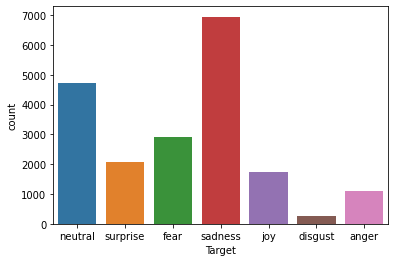

In [22]:
sns.countplot(df["Target"])
plt.show()

surprise도 조금 올라갔네요! 결측치 제거해보고 더 필요하다 싶으면 더 추가해주겠습니다. 이제 가장 적은 disgust의 데이터를 추가해봐야하는데 마땅한 dataset을 아직 찾지못했습니다. 근데 과연 저 혐오랑 감정의 데이터 셋을 남겨 놔야 할까요? 어떤식으로 이루어져있는지 일단 형태부터 봐주겠습니다.

In [23]:
print((df[df['Target'] == 'disgust']).tail(20))

                                              Utterance   Target
9504                                    Yeah. Hate him.  disgust
9509                                ...No, we hate him.  disgust
9563  Would you look at this dump? He hated us. This...  disgust
9564                   Have you ever seen so much crap?  disgust
9602  I wonder how long that milk  has been setting ...  disgust
9609  Oh, so you're saying you'd choose convenience ...  disgust
9617  Now, if after dinner you still really need to ...  disgust
9672                                            No, no!  disgust
9673                               What are you crazy?!  disgust
9678                                   No-o-o!  No way!  disgust
9734                                       I ate a bug.  disgust
9805                                  It’s so annoying.  disgust
9807                                        You bug me.  disgust
9849        Dad, please don’t pick your teeth out here!  disgust
9850  Alright, and if you

흠.. 마땅히 데이터를 추가할 데이터셋은 찾지못했습니다. 이걸 없앨지 그냥 적은 상태로 학습시킬지는 더 생각해봐야겠어요,,

## ** anger 추가 **

In [24]:

df_anger = pd.read_csv('/content/drive/MyDrive/쿠다/project1/Emotion_final.csv')
df_anger.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [25]:
df_anger = df_anger[df_anger['Emotion'] == 'anger']
df_anger.head()

,Text,Emotion
2,im grabbing a minute to post i feel greedy wrong,anger
4,i am feeling grouchy,anger
12,i think it s the easiest time of year to feel ...,anger
20,i feel irritated and rejected without anyone d...,anger
24,i already feel like i fucked up though because...,anger


In [26]:
df_anger.rename(columns = {'Text':'Utterance', 'Emotion':'Target'}, inplace = True)
df_anger.head()

,Utterance,Target
2,im grabbing a minute to post i feel greedy wrong,anger
4,i am feeling grouchy,anger
12,i think it s the easiest time of year to feel ...,anger
20,i feel irritated and rejected without anyone d...,anger
24,i already feel like i fucked up though because...,anger


In [27]:
df = pd.concat([df, df_anger])
df.head()

,Utterance,Target
0,also I was the point person on my company’s tr...,neutral
1,You must’ve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So let’s talk a little bit about your duties.,neutral
4,My duties? All right.,surprise


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


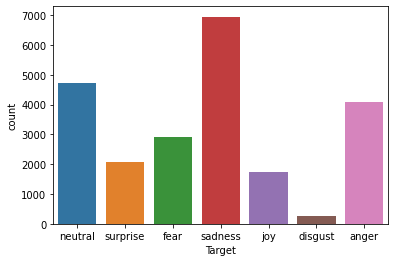

In [28]:
sns.countplot(df["Target"])
plt.show()

흠..일단 지금까지 결과를 보면...sad는 좀 줄여야 할거 같고 surprise, fear, joy는 조금더 추가하면 좋을 것 같아요... 데이터셋을 찾아볼까요..?
오 찾다보니깐 hate의 감정을 지닌 데이터셋을 찾았어요... disgust에 넣으면 될것 같아요... 한번 추가해보겠습니다.

## **disgust 추가**

https://www.kaggle.com/datasets/manuelbenedicto/figure-eight-labelled-textual-dataset

In [29]:
idx = df[df['Target'] == 'disgust'].index
df.drop(idx, inplace = True)

In [30]:
df_disgust = pd.read_csv('/content/drive/MyDrive/쿠다/project1/text_emotion.csv')

In [31]:

df_disgust.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [32]:
print((df_disgust[df_disgust['sentiment'] == 'worry']).tail(20))

         tweet_id sentiment           author  \
39812  1753885098     worry    Tickelmeaimed   
39824  1753885425     worry      distrakzion   
39841  1753886120     worry    ElodieMoreels   
39846  1753886198     worry        kateblogs   
39849  1753886317     worry       Spidersamm   
39865  1753886836     worry     NUMB3R1D1VAA   
39868  1753887073     worry        ficklampa   
39872  1753887165     worry         surbhi04   
39876  1753887284     worry         SAGasser   
39884  1753887660     worry     thehermitage   
39886  1753887666     worry      linnetwoods   
39895  1753902404     worry         dubbayoo   
39896  1753902429     worry  LizLemonCologne   
39902  1753902622     worry           walski   
39903  1753902656     worry     Ryan_A_Smith   
39936  1753903426     worry       carastjohn   
39938  1753903505     worry        primatage   
39941  1753903578     worry        somemandy   
39956  1753903987     worry           nadszy   
39978  1753904868     worry  theknickerm

제거

In [33]:
df_disgust = df_disgust.drop(['tweet_id'], axis = 1)
df_disgust.head()

,sentiment,author,content
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [34]:
df_disgust = df_disgust.drop(['author'], axis = 1)
df_disgust.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [35]:
df_disgust = df_disgust[(df_disgust['sentiment'] == 'hate') | (df_disgust['sentiment'] == 'worry')]

In [36]:
print(df_disgust.tail(20))

      sentiment                                            content
39824     worry  watching click, they are talkin about twitter ...
39841     worry  @davepenny47 Actually, I also thought Mother's...
39846     worry  @rustycharm Evening  Yorkshire's warm but over...
39849     worry  doing the andy dance  the one on fonzie gomez ...
39865     worry  Whats your name: Adelaide-Marie How old r u: 1...
39868     worry                   @wendy_fred6 *shivers with fear*
39872     worry               @ram014  thanks...but what happened?
39876     worry  thinking about recent job opportunities and ho...
39884     worry  @Puppetguy indeed, we live a life on the edge ...
39886     worry  @kateblogs It's never too late - they just nee...
39895     worry  @capricorn_one Could use GarageBand though it'...
39896     worry  ï¿½Chillingoutnow Just testing how to work Twi...
39902     worry  It takes nearly 2 days to figure out what caus...
39903     worry  @chrispringle Luke M here, thanks Ps Chris! U

In [37]:
df_disgust = df_disgust[['content', 'sentiment']]
df_disgust.head()

,content,sentiment
5,Re-pinging @ghostridah14: why didn't you go to...,worry
7,Hmmm. http://www.djhero.com/ is down,worry
11,Choked on her retainers,worry
18,@PerezHilton lady gaga tweeted about not being...,worry
20,@raaaaaaek oh too bad! I hope it gets better. ...,worry


In [38]:
df_disgust.loc[df_disgust.sentiment.str.contains('hate'), 'sentiment'] = 'worry'
df_disgust.head()

,content,sentiment
5,Re-pinging @ghostridah14: why didn't you go to...,worry
7,Hmmm. http://www.djhero.com/ is down,worry
11,Choked on her retainers,worry
18,@PerezHilton lady gaga tweeted about not being...,worry
20,@raaaaaaek oh too bad! I hope it gets better. ...,worry


In [39]:
df_disgust.rename(columns = {'content':'Utterance', 'sentiment':'Target'}, inplace = True)
df_disgust.head()

,Utterance,Target
5,Re-pinging @ghostridah14: why didn't you go to...,worry
7,Hmmm. http://www.djhero.com/ is down,worry
11,Choked on her retainers,worry
18,@PerezHilton lady gaga tweeted about not being...,worry
20,@raaaaaaek oh too bad! I hope it gets better. ...,worry


In [40]:
df = pd.concat([df, df_disgust])
df.head()

,Utterance,Target
0,also I was the point person on my company’s tr...,neutral
1,You must’ve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So let’s talk a little bit about your duties.,neutral
4,My duties? All right.,surprise


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


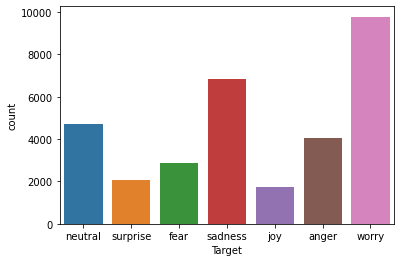

In [41]:
sns.countplot(df["Target"])
plt.show()


결측치를 확인

In [42]:
df.isnull().sum()

Utterance    0
Target       0
dtype: int64

흠...데이터들을 sad는 빼고 적은 것들 중심으로 더 추가해볼까요?

https://www.kaggle.com/datasets/parulpandey/emotion-dataset

## **joy 2차 추가**

In [43]:
df_joy2 = pd.read_csv('/content/drive/MyDrive/쿠다/project1/test.csv')
df_joy2.head()
df_joy2.rename(columns = {'Utterance':'text', 'Dialogue_ID':'label'}, inplace = True)
df_joy2.head()
df_joy2 = df_joy2.drop(['Speaker','ID'], axis = 1)
df_joy2.head()

,text,label
0,Why do all the coffee cups have figures below?,0
1,"Oh. It's so Monica can follow. Of this way, if...",0
2,You know what?,0
3,"Come on, Lydia, you can do it.",1
4,To push!,1


In [44]:
df_joy2 = df_joy2[df_joy2['label'] == 1]
df_joy2.head()

,text,label
3,"Come on, Lydia, you can do it.",1
4,To push!,1
5,"Push them, push them, harder, harder.",1
6,"Push them, push them, far!",1
7,"Let's take this ball and really move, hey, hey...",1


In [45]:
df_joy2['label'] = df_joy2['label'].astype(str)

<ipython-input-45-615a2134ed83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joy2['label'] = df_joy2['label'].astype(str)


In [46]:
df_joy2.dtypes

text     object
label    object
dtype: object

In [47]:
df_joy2.head()

,text,label
3,"Come on, Lydia, you can do it.",1
4,To push!,1
5,"Push them, push them, harder, harder.",1
6,"Push them, push them, far!",1
7,"Let's take this ball and really move, hey, hey...",1


In [48]:
df_joy2.loc[df_joy2.label.str.contains('1'), 'label'] = 'joy'
df_joy2.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,text,label
3,"Come on, Lydia, you can do it.",joy
4,To push!,joy
5,"Push them, push them, harder, harder.",joy
6,"Push them, push them, far!",joy
7,"Let's take this ball and really move, hey, hey...",joy


In [49]:
df_joy2.rename(columns = {'text':'Utterance', 'label':'Target'}, inplace = True)
df_joy2.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Utterance,Target
3,"Come on, Lydia, you can do it.",joy
4,To push!,joy
5,"Push them, push them, harder, harder.",joy
6,"Push them, push them, far!",joy
7,"Let's take this ball and really move, hey, hey...",joy


In [50]:
df = pd.concat([df, df_joy2])
df.head()

,Utterance,Target
0,also I was the point person on my company’s tr...,neutral
1,You must’ve had your hands full.,neutral
2,That I did. That I did.,neutral
3,So let’s talk a little bit about your duties.,neutral
4,My duties? All right.,surprise


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


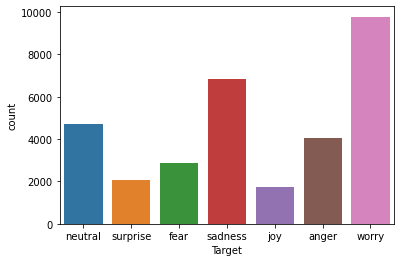

In [51]:
sns.countplot(df["Target"])
plt.show()

In [52]:
df.shape

(32125, 2)

In [53]:
df = df[~df['Utterance'].str.contains("#", na=False, case=False)]
df = df[~df['Utterance'].str.contains("http", na=False, case=False)]

In [54]:
#df.shape# df Utterance<=26인 행 삭제
#df.drop(df[(df['Utterance'].apply(len)<=26)].index, inplace=True)
#df

In [55]:
df.shape

(31524, 2)

In [56]:
import re
df['Utterance'] = df['Utterance'].str.replace(pat=r'@[\w_]+', repl= r'', regex=True)  #emoticon 제거
df['Utterance'] = df['Utterance'].str.replace(pat=r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', repl= r'', regex=True) #http로 시작되는 url 제거
df['Utterance'] = df['Utterance'].str.replace(pat=r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", repl= r'', regex=True) #http로 시작되지 않는 url 제거
df['Utterance'] = df['Utterance'].str.replace(pat='[#]+[0-9a-zA-Z_]+', repl= r'', regex=True) # hashtag 제거
df['Utterance'] = df['Utterance'].str.replace(pat='[^a-zA-Z]', repl= r' ', regex=True) #특수문자 제거


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


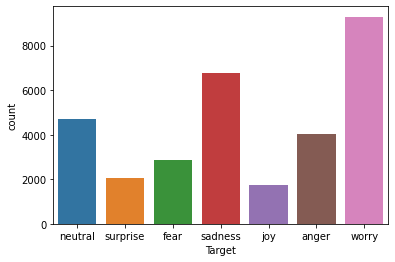

In [57]:
sns.countplot(df["Target"])
plt.show()

In [58]:
df.isnull().sum()

Utterance    0
Target       0
dtype: int64

In [59]:
df.to_csv("/content/drive/MyDrive/쿠다/project1/result.csv", index=False)